In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
steel_df=pd.read_excel('/content/drive/MyDrive/AI/steel_grade_prediction/steel_grade_additional_data_added.xlsx')

In [6]:
steel_df.head()

,Steel Grade,C,Si,Mn,P,S,Cr,Mo,Ni,Cu,...,Al,Mg,Zn,Fe,Sn,Ti,B,N,V,Nb
0,SUJ 2,0.98,0.19,0.42,0.020,0.018,1.470232,0.00,0.21,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SUJ 2,1.09,0.17,0.28,0.009,0.019,1.426054,0.01,0.12,0.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SUJ 2,0.99,0.30,0.47,0.018,0.020,1.545262,0.06,0.21,0.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SUJ 2,1.08,0.22,0.36,0.024,0.018,1.436607,0.07,0.14,0.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SUJ 2,1.02,0.22,0.32,0.021,0.006,1.333186,0.03,0.13,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
steel_df.describe()

,C,Si,Mn,P,S,Cr,Mo,Ni,Cu,Pb,Al,Mg,Zn,Fe,Sn,Ti,B,N,V,Nb
count,1829.000000,1829.000000,1679.000000,1709.000000,1709.000000,1677.000000,927.00000,1497.000000,1436.000000,180.000000,717.000000,180.000000,180.000000,180.000000,120.000000,832.000000,60.000000,60.000000,588.000000,570.000000
mean,0.207151,1.021370,0.755688,0.017603,0.022895,3.931692,0.03385,1.750132,0.704119,0.139111,0.136901,0.438056,0.721056,0.565667,0.095167,0.042499,0.002925,0.005267,0.003747,0.008332
std,0.240411,2.623957,0.565259,0.014482,0.055049,7.032597,0.06015,3.375497,1.246362,0.085850,0.317521,0.413408,0.818032,0.354559,0.059916,0.063950,0.000828,0.003013,0.010756,0.013972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001500,0.000000,0.000000,0.000000
25%,0.050000,0.089000,0.240000,0.010000,0.004000,0.020000,0.00200,0.010000,0.010000,0.070000,0.032000,0.117500,0.130000,0.280000,0.040000,0.001000,0.002250,0.003000,0.001000,0.000000
50%,0.110000,0.280000,0.700000,0.014000,0.010000,0.160000,0.00500,0.080000,0.110000,0.135000,0.040000,0.220000,0.400000,0.500000,0.100000,0.017000,0.002900,0.006000,0.001000,0.001000
75%,0.260000,0.640000,1.120000,0.021000,0.020000,1.308466,0.04000,0.250000,0.330000,0.182500,0.050000,0.922500,0.892500,0.892500,0.140000,0.056000,0.003500,0.008000,0.002000,0.011750
max,1.100000,11.970000,3.270000,0.230000,0.350000,19.940000,0.32800,10.480000,4.990000,0.350000,1.788000,1.190000,2.960000,1.260000,0.200000,0.300000,0.004400,0.010000,0.136000,0.092000


**Comments:**
1. Carbon wt% of the dataset ranges from 0.0 ~ 1.1

      - 1.1 wt% of Carbon will be for Sintered materials
      
      - 0.0 wt% of Carbon will be for Aluminum
      
2. Mn wt% of the dataset ranges from 0.0 ~ 3.2 wt%
      

In [8]:
mn_max_index=steel_df['Mn'].idxmax()
print('Maximum Manganese is observed in {}'.format(steel_df['Steel Grade'][mn_max_index]))

Maximum Manganese is observed in SPC980DU


In [9]:
al_max_index=steel_df['Al'].idxmax()
print('Maximum Aluminum is observed in {}'.format(steel_df['Steel Grade'][al_max_index]))

Maximum Aluminum is observed in SCGA780TRIP45


As SCGA780TRIP45 is a TRIP steel Aluminum is used

In [10]:
cr_max_index=steel_df['Cr'].idxmax()
print('Maximum Chromium us observed in {}'.format(steel_df['Steel Grade'][cr_max_index]))

Maximum Chromium us observed in SUS 304


In [11]:
si_max_index=steel_df['Si'].idxmax()
print('Maximum Silicon is observed in {}'.format(steel_df['Steel Grade'][si_max_index]))

Maximum Silicon is observed in ADC 12 Z


**Comment** ADC 12 Z is a popular Aluminum Die casting grade which is used in Automotive applications. Aluminum and Silicon are major elements.

Silicon is good in metallic alloys used for casting. This is because it increases the fluidity of the melt, reduces the melting temperature, decreases the contraction associated with solidification and is very cheap as a raw material.

In [12]:
steel_df['C']

0       0.98
1       1.09
2       0.99
3       1.08
4       1.02
        ... 
2005    0.51
2006    0.55
2007    0.50
2008    0.53
2009    0.58
Name: C, Length: 2010, dtype: float64

In [13]:
steel_df.groupby(['Steel Grade']).agg({'C':['mean'],'Mn':['mean']})

,C,Mn
,mean,mean
Steel Grade,,
1470MPa,0.202000,1.446667
1470Mpa,0.207000,2.330000
16MnCr5,0.168167,1.162500
22MnB5,0.230333,1.223333
ADC 12,NaN,0.225833
...,...,...
SUS 631 J,0.044167,0.493667
SUS XM7,0.038167,1.006833


In [14]:
steel_grades=steel_df['Steel Grade'].replace('-','').str.upper()

In [15]:
steel_grades=steel_df['Steel Grade'].replace(' ','').str.upper()

In [16]:
steel_grades=steel_df['Steel Grade'].replace('/','').str.upper()

In [17]:
steel_df['Steel Grade'].value_counts().loc[lambda x : x>10]

SPC270C          63
SPH440-OD        61
SUJ 2            61
22MnB5           60
SUM 24           60
SUS 302          60
SUS 304          60
SUS 429          60
SUS 631 J        60
SUS XM7          60
PMF 4040         60
PMF 4050         60
ADC 12           60
16MnCr5          60
SUS 301          60
Al 6061          60
SPC270D          44
ADC 12 Z         40
SPC980DU         36
SPC440           35
SPH270C-OD       34
SPH440OD         34
S50C             30
S10C             30
S18C             30
S35C             30
SAE1010          30
S55C             30
SCM30            30
SCM35            30
SCM415           30
SCM420           30
SCR420           30
SAE1025          30
SAE1035          30
SAE1045          30
SAE1050          30
SAE1018          30
SAE1055          30
SCGA270 D -45    24
SPC270E          22
ADC 12 Z         20
SPH590-OD        19
SPC590DU         17
SPC590           15
SCGA270 C -45    15
Name: Steel Grade, dtype: int64

In [18]:
steel_df['Steel Grade'].replace(' ','')

0         SUJ 2
1         SUJ 2
2         SUJ 2
3         SUJ 2
4         SUJ 2
         ...   
2005    SAE1055
2006    SAE1055
2007    SAE1055
2008    SAE1055
2009    SAE1055
Name: Steel Grade, Length: 2010, dtype: object

In [19]:
steel_df['Steel Grade'].value_counts().loc[lambda x : x>10]

SPC270C          63
SPH440-OD        61
SUJ 2            61
22MnB5           60
SUM 24           60
SUS 302          60
SUS 304          60
SUS 429          60
SUS 631 J        60
SUS XM7          60
PMF 4040         60
PMF 4050         60
ADC 12           60
16MnCr5          60
SUS 301          60
Al 6061          60
SPC270D          44
ADC 12 Z         40
SPC980DU         36
SPC440           35
SPH270C-OD       34
SPH440OD         34
S50C             30
S10C             30
S18C             30
S35C             30
SAE1010          30
S55C             30
SCM30            30
SCM35            30
SCM415           30
SCM420           30
SCR420           30
SAE1025          30
SAE1035          30
SAE1045          30
SAE1050          30
SAE1018          30
SAE1055          30
SCGA270 D -45    24
SPC270E          22
ADC 12 Z         20
SPH590-OD        19
SPC590DU         17
SPC590           15
SCGA270 C -45    15
Name: Steel Grade, dtype: int64

In [20]:
len(steel_df['Steel Grade'].value_counts().loc[lambda x : x>10])

46

**Comments:** There are 46 steel grades which have records above 10

In [21]:
len(steel_df['Steel Grade'].value_counts().loc[lambda x : x<5])

63

**Comments:** There are 63 steel grades which have less than 5 records

In [22]:
len(steel_df['Steel Grade'].value_counts().loc[lambda x : x<4])

60

**Comments:** There are 60 steel grades which have less than 4 records

Steel grades which have less than 5 records, might make the model overfit.

**Case 1:** Can check the accuracy of the model with less than 5 records

**Case 2:** Check the accuracy of the model without steel grades with less than 5 records 

**Analyzing Major elements in the database**

In [23]:
steel_df['C'].isnull().sum()

181

In [24]:
steel_df['Mn'].isnull().sum()

331

In [25]:
steel_df['Si'].isnull().sum()

181

In [26]:
steel_df['B'].isnull().sum()/100

19.5

**Splitting Dataset into x and y**

In [27]:
y=steel_df['Steel Grade']
x=steel_df.iloc[:,1:]

In [28]:
x.head()

,C,Si,Mn,P,S,Cr,Mo,Ni,Cu,Pb,Al,Mg,Zn,Fe,Sn,Ti,B,N,V,Nb
0,0.98,0.19,0.42,0.020,0.018,1.470232,0.00,0.21,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.09,0.17,0.28,0.009,0.019,1.426054,0.01,0.12,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.99,0.30,0.47,0.018,0.020,1.545262,0.06,0.21,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.08,0.22,0.36,0.024,0.018,1.436607,0.07,0.14,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.02,0.22,0.32,0.021,0.006,1.333186,0.03,0.13,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
y.head()

0    SUJ 2
1    SUJ 2
2    SUJ 2
3    SUJ 2
4    SUJ 2
Name: Steel Grade, dtype: object

In [30]:
missing_values=pd.DataFrame((x.isnull().sum()/len(steel_df['Steel Grade']))*100)                       

In [31]:
missing_values.columns=['%of Missing Values']

**Top 5 elements with missing values**

In [32]:
missing_values.sort_values('%of Missing Values',ascending=False).head(5)

,%of Missing Values
N,97.014925
B,97.014925
Sn,94.029851
Pb,91.044776
Fe,91.044776


Text(0.5, 1.0, 'Missing Values present in the dataset')

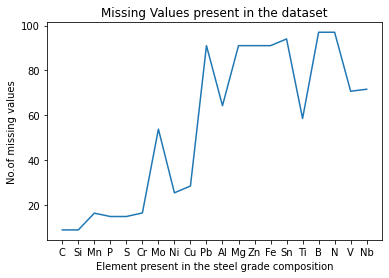

In [33]:
plt.plot(x.isnull().sum()/(len(steel_df))*100)
plt.xlabel('Element present in the steel grade composition')
plt.ylabel('No.of missing values')
plt.title('Missing Values present in the dataset')

####**Comments**

#####**(i) Nitrogen (N) & Boron (B):** Nitrogen is trapped gas inside Molten steel. It is generally removed during Oxygen blowing process in Blast Furnace and Converter Furnace. Any Nitrogen left in the is removed during Vaccum Degassing.  

Nitrogen is generally evaluated for Boron steel only, as Boron is added in the steel, Boron reacts with Nitrogen and forms Boron nitride, which makes the material brittle. To avoid this Titanium is added to Boron steel composition to fix Nitrogen and activate Boron.

Boron and Nitrogen are only mentioned for Boron steels and not for any other steel grades, so, their missing values are same for both elements.

In existing dataset, there is only one alloy steel grade it is 22MnB5, in which Boron is added and Nitrogen is evaluated


####**(ii) Lead (Pb) and Ferrous (Fe):**
Lead is used in Aluminum Die cast materials for better machinability.
As Lead free Aluminum is also used, keeping in mind the environmental concerns with Lead. 
Ferrous is also used in minor amounts in Aluminum Die cast grades


In [34]:
steel_df['Sn'].describe()

count    120.000000
mean       0.095167
std        0.059916
min        0.000000
25%        0.040000
50%        0.100000
75%        0.140000
max        0.200000
Name: Sn, dtype: float64

####**Replacing missing values**

Generally missing values are replaced by either Mean, Median or Mode values.
But, in this case, replacing with either Mean, Median or Mode will change the grade. 

NaN values cannot be dropped because, it will nullify the chances of predicting steel grades.

#####**Example:** Boron is available only for Boron steel, if we drop Boron for having majority of NaN values it will not help in predicting Boron steel grades.

#####**Conclusion**

NaN values will be replaced by 0.0

In [37]:
x_mod=x.fillna(0.0)

In [38]:
x_mod.isnull().sum()

C     0
Si    0
Mn    0
P     0
S     0
Cr    0
Mo    0
Ni    0
Cu    0
Pb    0
Al    0
Mg    0
Zn    0
Fe    0
Sn    0
Ti    0
B     0
N     0
V     0
Nb    0
dtype: int64

####**Comments**
NaN values are replaced by 0.0. Confirmed that there are no more NaN values in the dataset. THis dataset will be used for further predictive analysis by Machine Learning Models.